In [9]:
import os
import math
import numpy as np
from scipy.stats import multivariate_normal
import pandas as pd
from scipy import misc
from scipy import spatial
from scipy.ndimage import interpolation

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [10]:
sDir = '/Users/birdbrain/Documents/Research/Projects/Schatz/Data/g21chaotic/r4000_2016_11_01_superfast/g21flow'
sFeatures = 'feature_vectors/%06d.txt'
sTemperature = 'bmps/%06d.bmp'


In [11]:
allFeatures = []

for idx in range(0, 600, 17):
    if os.path.exists(sDir + "/" + (sFeatures % idx)):
        features = pd.read_csv(sDir + "/" + (sFeatures % idx), sep=' ', header=None)
        features = np.asarray(features)
#         features = np.hstack((np.ones((features.shape[0],1))*idx, features))
        if len(allFeatures) == 0:
            allFeatures = features
        else:
            allFeatures = np.append(allFeatures, features, axis=0)

print allFeatures.shape
print allFeatures[0,:]
np.set_printoptions(suppress=True)
print np.amax(allFeatures,axis=0)

(5074, 112)
[  0   0   0 119 246   1   0   0   0   0   0   0   0  18 167  45  24  39
   2   0   0   0   0   0   0   0   0   0  67   0   0   0   0   0   0   0
   0   0   0   0  32   0   0   0   0   0   0   0   0   0   0  35  68   0
   0   0   0   0   0   0   0   0   0   0  20  30  75  55  10   0   0   0
   0   0   0  17  76   0   0   0   0   0   0   0   0   0   0 140  63  12
   0   0   0   0   2   2   0   0  59  73 127   6   0   0   1   8  74   0
   0   0   0   0]
[188 184   5 388 389   1   1   1   1   1   1   0   0  18 338 251  66  62
  53  55  53  57  54  62  52  64  61  62  67  57  64  61  54  62  65  67
  60  57  56  67  67  66  59  51  54  58  60  52  53  54  55  67  68  67
  61  62  54  64  65  63  64  62  60  65 198 162 178  99  90 103 170 203
 186 195 175 188 216 207 216 188 179 185 111 102 103 143 127 159 213 172
 216 173 203 201 134 164 174 120 188 195 194 189 166 124 141 108 216 200
 221 214 220 192]


In [12]:
# Filter by lyapunov value

# d = 5
# myFeatures = allFeatures[(allFeatures[:,d]>=0), :]
# myFeatures = np.hstack((myFeatures[:, [0,1,2]], myFeatures[:,7:]))

# Filter by defect type

d = 2
myFeatures = allFeatures[(allFeatures[:,d+5]==1),:]
myFeatures = np.hstack((myFeatures[:, [0,3,4]], myFeatures[:,15:]))

X = myFeatures
X = X[:,3:]
X[:,0] = X[:,0]*2
print myFeatures[0,:]
print X[0,:]
# X = myFeatures[:, featureStart:]
# X = np.hstack((X[:,0:32],X[:,32:]/1.))

print X.shape

[ 21 182 254 398  44   3   0   0   0   0   0   0   0   0   0  18  57  10
   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0
   0   1  38  25  41  23   2   0   0   0   0   0   0   0   0   0  44  32
   0   0   0   0   0  21  30  12  31  38  70 104  28   0   0   0   0   0
   0   0   0  12  37  32   0   0   0   0   0   0   5  69  42  29  10  29
  84  11   3   0   0  29  37   3   6   1]
[398  44   3   0   0   0   0   0   0   0   0   0  18  57  10   0   0   0
   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   1  38
  25  41  23   2   0   0   0   0   0   0   0   0   0  44  32   0   0   0
   0   0  21  30  12  31  38  70 104  28   0   0   0   0   0   0   0   0
  12  37  32   0   0   0   0   0   0   5  69  42  29  10  29  84  11   3
   0   0  29  37   3   6   1]
(492, 97)


(240.0, 420.0, 0.0, 70.0)

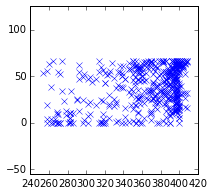

In [13]:
# Plot the means
plt.rcParams['figure.figsize'] = (3.0, 3.0)
plt.plot(X[:,0], X[:,1], 'x', markerfacecolor='blue')
plt.axis('equal')

In [14]:

def convertMainOrientationBin(_bin, _nbins):
    # Convert from [0,_nbins] to [0,180] to [0,pi]
    orientation = math.radians(_bin*180.*(1./_nbins))
    # Convert from [0,pi] to [-pi/2, pi/2]
    orientation = orientation - math.pi/2.
    # Convert from [-pi/2, pi/2] to [pi/2 -> -pi/2 decreasing]
    orientation = orientation*-1.
    
    return orientation

[  0.          33.37663854  37.72267223  45.23273151  49.90991885]


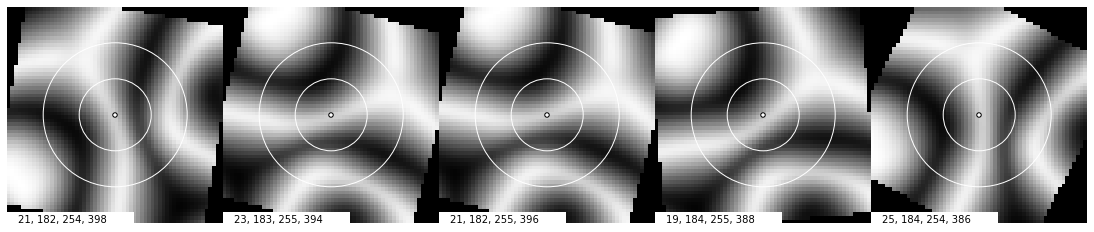

[   0.           38.41874542   92.41212042  126.90941651  129.87686476]


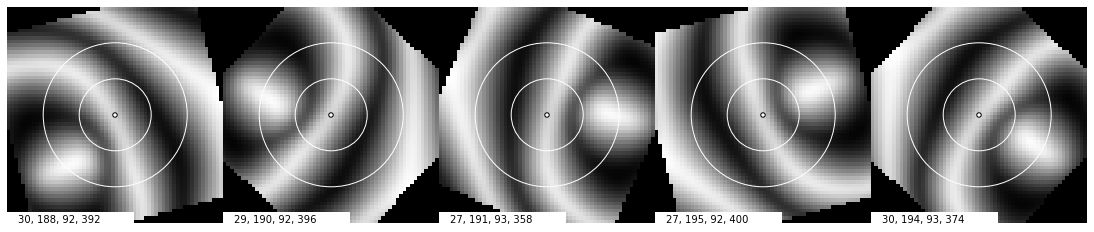

[  0.          27.67670501  28.94822965  54.03702434  90.67524469]


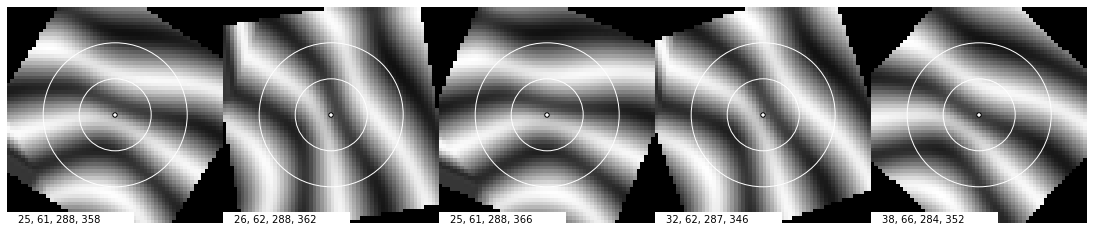

[  0.          27.64054992  39.40812099  40.42276586  44.754888  ]


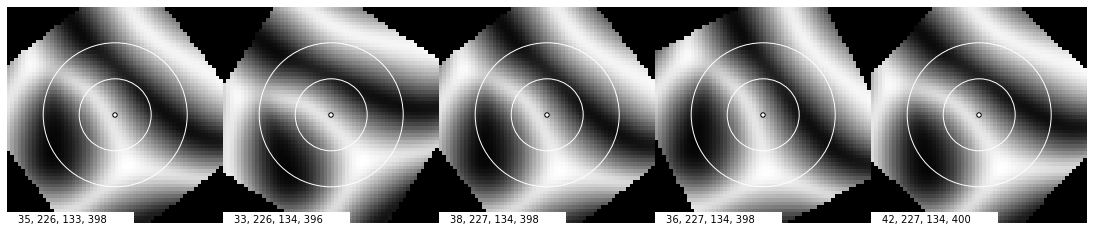

[   0.           66.64833081  126.72016414  174.60813269  178.10109489]


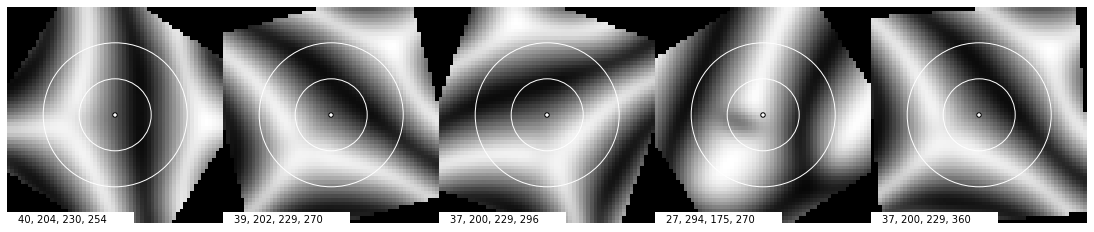

[   0.           92.43376007  103.03397498  103.35859906  105.74497624]


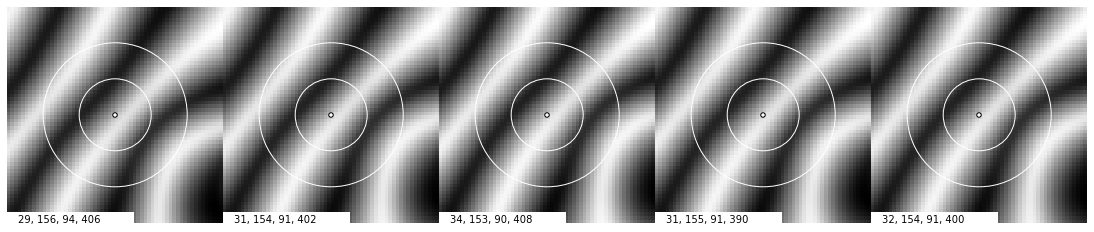

[  0.          24.93992783  42.84857057  61.32699243  63.96092557]


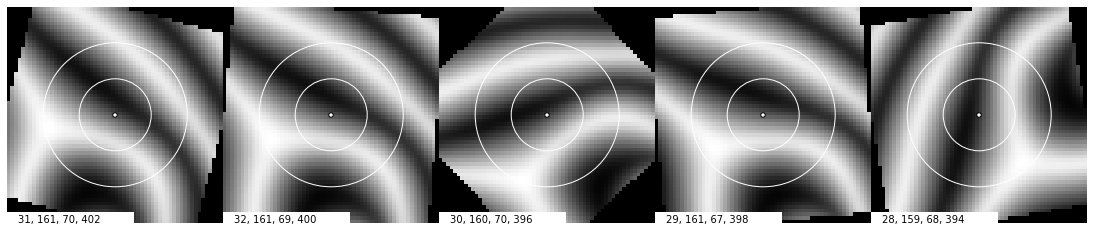

[  0.          27.03701167  39.39543121  49.34571917  55.5967625 ]


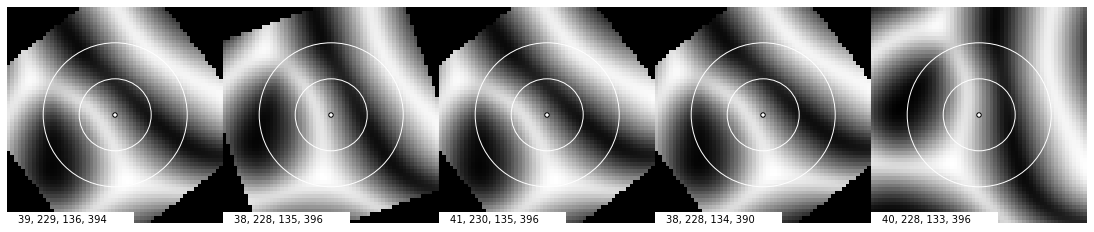

[   0.           48.13522619   62.0644826   141.29755837  154.68354793]


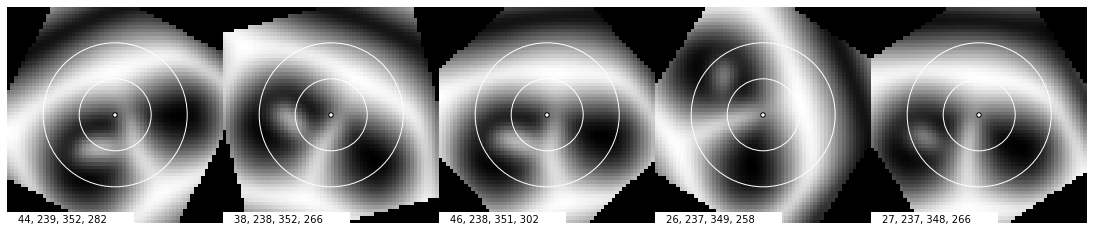

[   0.           28.82707061   30.13303835  105.14276009  110.41286157]


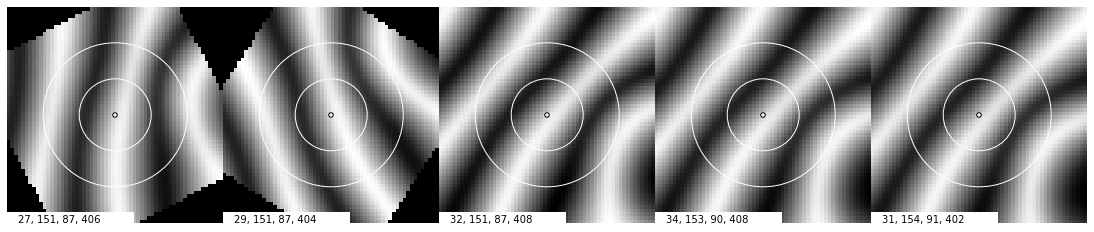

In [18]:
# Get the features that are within the radius of the locations
tree = spatial.KDTree(X)

n = 5

plt.rcParams['figure.figsize'] = (15.0, 3.0)

for j in range(0, X.shape[0], 50):
    
    
    # Choose a random item in the list and print its 4 nearest neighbors
    nn = tree.query(X[j,:], k=5)
    
    print nn[0]

    for i in range(nn[1].shape[0]):

        sample = nn[1][i]

        temp = misc.imread(sDir + "/" + (sTemperature % myFeatures[sample,0]))

        radius = 30
        tmp_radius = radius

        x = myFeatures[sample,1]
        y = myFeatures[sample,2]

        temp = misc.imread(sDir + "/" + (sTemperature % myFeatures[sample,0]))
        
        
        cropped_bmp = temp[(y-radius):(y+radius), (x-radius):(x+radius)]
        rotated_image = interpolation.rotate(cropped_bmp, -float(myFeatures[sample,15]*(180./19.)), reshape=False)

        plt.subplot(1,n,i+1)
        plt.set_cmap('gray')
#         plt.pcolor(temp[(y-radius):(y+radius), (x-radius):(x+radius)].astype(np.int))
        plt.pcolor(rotated_image)
        plt.scatter(radius, radius, color='white', edgecolor='black')
        plt.gca().set_axis_off()
        plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
                    hspace = 0, wspace = 0)
        plt.margins(0,0)

        ax = plt.gca()
        circle1 = plt.Circle((tmp_radius, tmp_radius), 20, color='white', fill=False, lw=1)
        ax.add_artist(circle1)

        circle2 = plt.Circle((tmp_radius, tmp_radius), 10, color='white', fill=False, lw=1)
        ax.add_artist(circle2)

        plt.fill([0,radius+5,radius+5,0], [0,0,3,3], color='white')
        plt.annotate(', '.join([str(int(x)) for x in myFeatures[sample,0:4]]),(3,0))

        plt.gca().xaxis.set_major_locator(plt.NullLocator())
        plt.gca().yaxis.set_major_locator(plt.NullLocator())

        plt.axis('off')


    plt.show()